In [78]:
#BROWNIAN MOTION STOCHASTIC PROCESS
#Brownian motion is the random motion exhibited by particles which have been suspended in a gas or liquid. This random motion is caused by the collision of the particles with the atoms or molecules in the liquid or gas. Brownian Motion is named after the Botanist Robert Brown who observed the random movements in 1827. The relationship between Brownian Motion and financial markets dates back to a paper written many years later, in 1900, by Louis Bachelier entitled The Theory of Speculation. His paper was the first to propose the use of Brownian Motion to evaluate stock options. The paper did not surface until later works in deriving the famous Black Scholes options pricing formula developed by Fisher Black and Myron Scholes in 1973. In the context of stochastic processes used in finance, Brownian Motion is often described as a Wiener process, denoted by Wt. A Wiener process is described by the following properties,

#W0=0
#The function t→Wt is continuous
#Wt has independent normally distributed increments i.e. Wt−Ws ~ N(0,t−s)
#In practice Brownian Motion is not used to model asset prices. I have included it because it is the foundation of every other stochastic process discussed in this article.



In [79]:
# mistakes in the codes, see mine
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

#"""
#Note that this Gist uses the Model Parameters class found here  - https://gist.github.com/StuartGordonReid/f01f479c783dd40cc21e
#"""

def brownian_motion_log_returns(param):
 #   """
  #  This method returns a Wiener process. The Wiener process is also called Brownian motion. For more information
   # about the Wiener process check out the Wikipedia page: http://en.wikipedia.org/wiki/Wiener_process
    #:param param: the model parameters object
    #:return: brownian motion log returns
    #"""
    sqrt_delta_sigma = math.sqrt(param.all_delta) * param.all_sigma
    return nrand.normal(loc=0, scale=sqrt_delta_sigma, size=param.all_time)


def brownian_motion_levels(param):
    #"""
    #Returns a price sequence whose returns evolve according to a brownian motion
    #:param param: model parameters object
    #:return: returns a price sequence which follows a brownian motion
    #"""
    return convert_to_prices(param, brownian_motion_log_returns(param))

In [80]:
#THE ORNSTEIN–UHLENBECK STOCHASTIC PROCESS
#The Ornstein Uhlebneck stochastic process is another mean-reverting process which is sometimes used for modelling interest rates. The Ornstein Uhlenbeck process is named after Leonard Ornstein and George Eugene Uhlenbeck. The difference between the Ornstein Uhlenbeck stochastic process and the CIR process is that the CIR processes multiplies the stochastic component by the square root of the previous value for the interest rate. The stochastic differential equation for the Ornstein Uhlenbeck process is,

#drt=a(b−rt)dt+σdWt # rt can be replaced by xt, b is the mean miu and sigma is the diffusion coefficient(not sure though)

#where Wt is a Wiener process, a is the rate at which the process mean reverts (a larger number results in a faster mean reverting process), b is the long run average interest rate, and σ is the volatility of the process. The code for the Ornstein Uhlenbeck stochastic process is given below.

In [81]:
# OU process
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

#"""
#Note that this Gist uses the Model Parameters class found here  - https://gist.github.com/StuartGordonReid/f01f479c783dd40cc21e
#"""

def ornstein_uhlenbeck_levels(param):
    #"""
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    #:param param: the model parameters object
    #:return: the interest rate levels for the Ornstein Uhlenbeck process
    #"""
    ou_levels = [param.all_r0]
    brownian_motion_returns = brownian_motion_log_returns(param)
    for i in range(1, param.all_time):
        drift = param.ou_a * (param.ou_mu - ou_levels[i-1]) * param.all_delta
        randomness = brownian_motion_returns[i - 1]
        ou_levels.append(ou_levels[i - 1] + drift + randomness)
    return ou_levels

In [82]:
# putting everything together
import math
import numpy as np
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

def brownian_motion_log_returns(dt,sigma,time):
    #  This method returns a Wiener process
    sqrt_delta_sigma = math.sqrt(dt)*sigma
    return sqrt_delta_sigma*np.random.normal(0,1)

#define now the hyperparameters for the two functions

def ou_levels(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

In [83]:
dt=0.02
time=np.arange(0,2,dt)# time
sigma=0.3
a=1# the coefficient in front, the rate
b=1.2# the mean

In [84]:
# Simulation of OU process
ou_levels(a,b,dt,sigma,time)


array([0.        , 0.02444548, 0.12372464, 0.15063457, 0.18867684,
       0.28879862, 0.24984208, 0.21494312, 0.27577228, 0.24448542,
       0.34605658, 0.34558708, 0.33096351, 0.42992776, 0.50814213,
       0.60121311, 0.65162906, 0.62605777, 0.71857381, 0.71683191,
       0.76054061, 0.8095183 , 0.81075141, 0.84458957, 0.89082369,
       0.9129776 , 0.87207442, 0.89128611, 0.95373417, 0.92919147,
       0.92825918, 0.915232  , 0.99938497, 1.03192033, 1.05256906,
       1.02285291, 1.04927426, 1.02367926, 1.02855613, 1.00500834,
       1.03760681, 1.06531735, 1.05917364, 1.0787913 , 1.03484081,
       0.97487529, 0.99801959, 1.00913056, 1.03989005, 1.14420052,
       1.18538738, 1.14695187, 1.19540382, 1.13966652, 1.12128981,
       1.11996877, 1.19426037, 1.16277789, 1.12845951, 1.12571334,
       1.09905007, 1.14886818, 1.1040732 , 1.05730877, 1.04158746,
       1.02362599, 1.10901658, 1.15111676, 1.15580891, 1.10470191,
       1.14243115, 1.10114699, 1.03758496, 1.0912371 , 1.10685

In [85]:
#1. Simulating the Ornstein–Uhlenbeck process

#You should first be familiar with how to simulate this process using the Euler–Maruyama method. The stochastic differential equation (SDE)

#dxt=θ(μ−xt)dt+σdWt
#can be discretized and approximated via

#Xn+1=Xn+θ(μ−Xn)Δt+σΔWn
#where ΔWn are independent identically distributed Wiener increments, i.e., normal variates with zero mean and variance Δt. Thus, Wtn+1−Wtn=ΔWn∼N(0,Δt)=Δt−−−√ N(0,1). This can be simulated in Matlab very easily using randn to generate standard normal variates:


#another way of simulating an OU process; MATLAB CODE
#th = 1;
#mu = 1.2;
#sig = 0.3;
#dt = 1e-2;
#t = 0:dt:2;             % Time vector
#x = zeros(1,length(t)); % Allocate output vector, set initial condition
#rng(1);                 % Set random seed
#for i = 1:length(t)-1
 #   x(i+1) = x(i)+th*(mu-x(i))*dt+sig*sqrt(dt)*randn;
#end
#figure;
#plot(t,x);

In [86]:
#Simulation of an OU process
training_data=ou_levels(a,b,dt,sigma,time)# the first one is zero because param_all_r0 starts at 0
t=time# time vector
x=training_data

In [87]:
training_data

array([0.        , 0.01672191, 0.07313177, 0.13060745, 0.24377363,
       0.31960224, 0.32154714, 0.32896019, 0.3930356 , 0.43697537,
       0.47939434, 0.42520482, 0.43966865, 0.42356328, 0.45096821,
       0.46178468, 0.51516461, 0.54231974, 0.58883442, 0.58126924,
       0.5535744 , 0.54910597, 0.56140174, 0.59025975, 0.69830892,
       0.70654992, 0.67586161, 0.67166561, 0.66256359, 0.69373985,
       0.63849457, 0.65240866, 0.67000049, 0.69045109, 0.67530009,
       0.67569993, 0.62576814, 0.61632299, 0.60496487, 0.63451708,
       0.59677407, 0.64198202, 0.71654799, 0.638395  , 0.66771173,
       0.70707627, 0.68989058, 0.68323795, 0.68793555, 0.68554264,
       0.68272148, 0.62196023, 0.68241031, 0.73856644, 0.71328699,
       0.66080614, 0.69369692, 0.67939437, 0.69582905, 0.69236451,
       0.73185672, 0.7706953 , 0.7484969 , 0.6988358 , 0.6417007 ,
       0.67876289, 0.6387486 , 0.62847123, 0.61460235, 0.62408006,
       0.55344906, 0.57438928, 0.60912831, 0.62469717, 0.62301

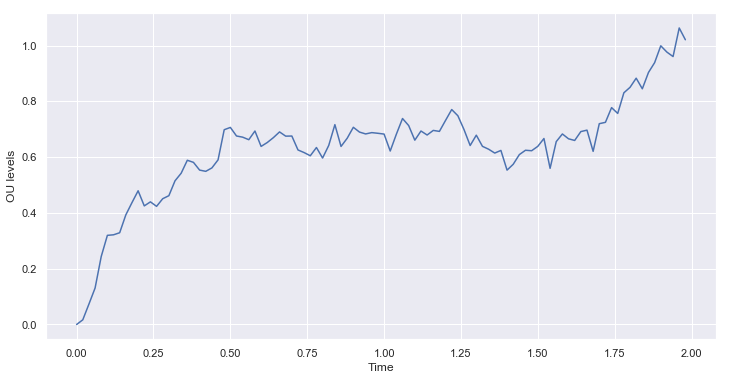

In [88]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
#sigma=0.3 in this plot

In [89]:
#Simulation of an OU process
training_data=ou_levels(5,b,dt,2,time)
t=time# time vector
x=training_data

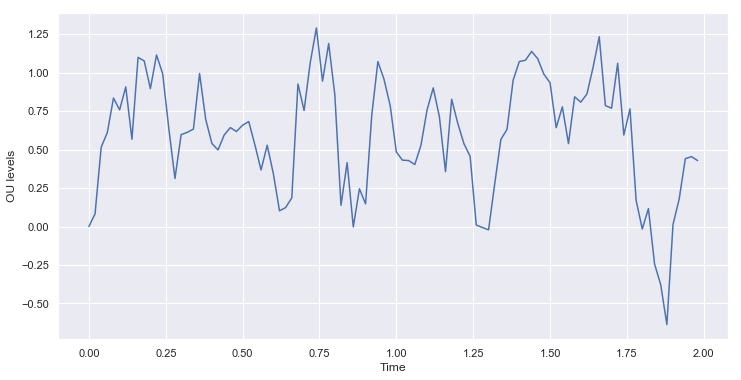

In [90]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
# a=5 in this plot, sigma=2 

In [91]:
#Simulation of an OU process
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

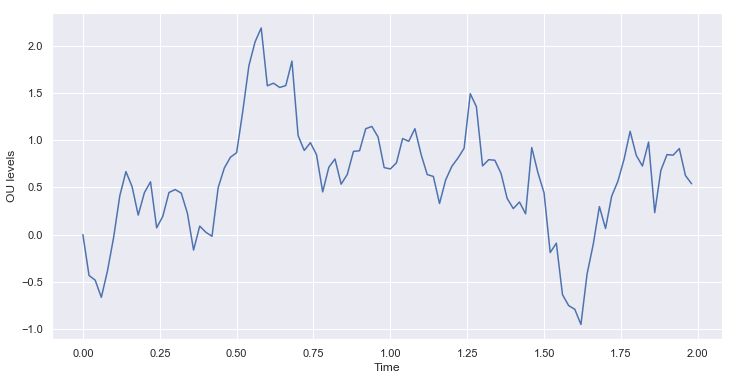

In [92]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
# a=1 in this plot, sigma=2 

In [93]:
training_data=ou_levels(5,b,dt,0.3,time)
t=time# time vector
x=training_data

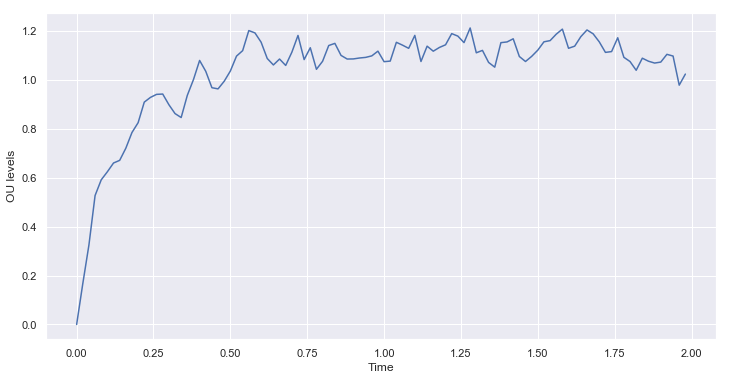

In [94]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()
# a=5 in this plot, sigma=0.3

In [95]:
# starts again here
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [96]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [97]:
t=t[::8]
x=x[::8]


In [98]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [99]:
k = gpflow.kernels.Matern12(1,lengthscales=0.1)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

In [100]:
#They have everything as column vectors
#N = 12
#X = np.random.rand(N,1)
#Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
#plt.plot(X, Y, 'kx', mew=2)

Text(0,0.5,'OU level')

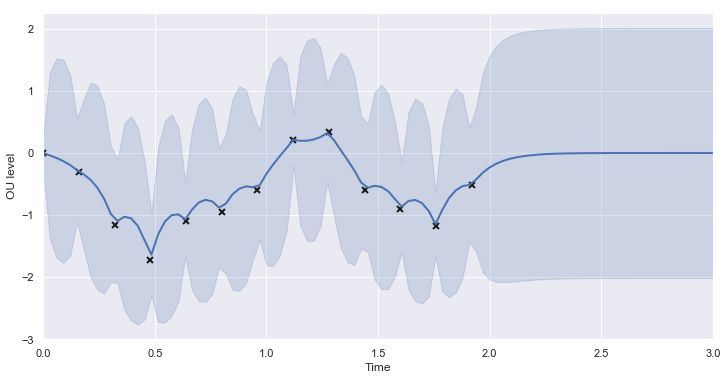

In [101]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [102]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.1
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.376869
  Number of iterations: 28
  Number of functions evaluations: 34


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.376869
  Number of iterations: 28
  Number of functions evaluations: 34


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.6450597335908811
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.5893601768678649
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0056374975639782e-06


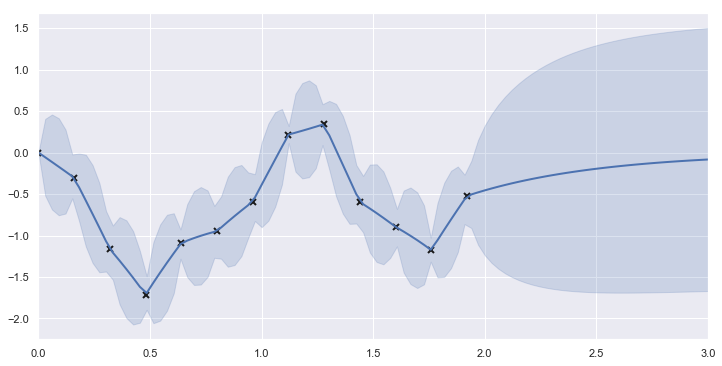

In [103]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [104]:
# another lengthscale value 


In [105]:
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [106]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [107]:
t=t[::8]
x=x[::8]


In [108]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [109]:
k = gpflow.kernels.Matern12(1,lengthscales=0.5)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

Text(0,0.5,'OU level')

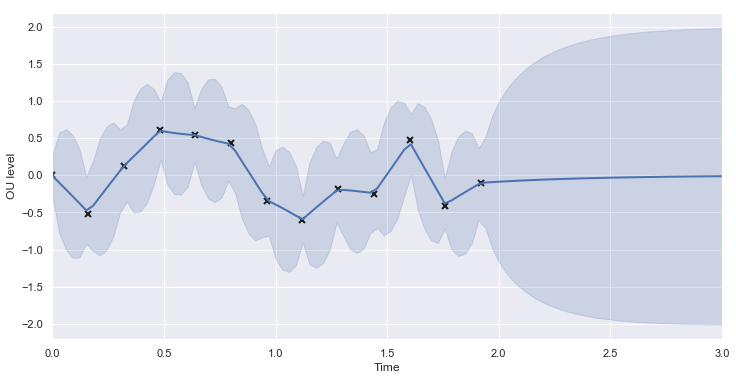

In [110]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [111]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.5
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 6.276545
  Number of iterations: 30
  Number of functions evaluations: 36


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 6.276545
  Number of iterations: 30
  Number of functions evaluations: 36


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.16162667319657706
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.10859378632752868
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0175153365831576e-06


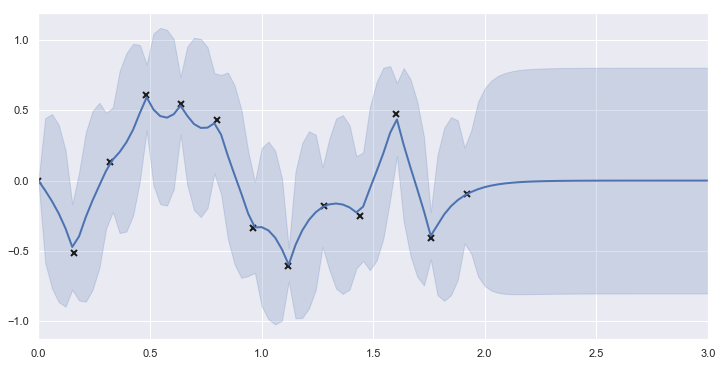

In [112]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [113]:
# another lengthscale value

In [114]:
# starts again here
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [115]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [116]:
t=t[::8]
x=x[::8]

In [117]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [118]:
k = gpflow.kernels.Matern12(1,lengthscales=0.01)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

Text(0,0.5,'OU level')

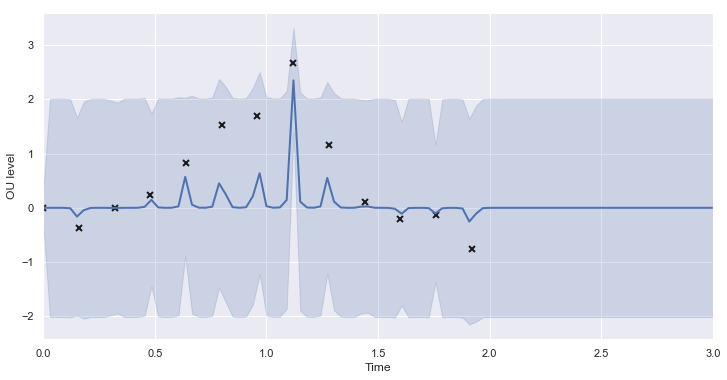

In [119]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [120]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.01
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 19.486612
  Number of iterations: 4
  Number of functions evaluations: 6


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 19.486612
  Number of iterations: 4
  Number of functions evaluations: 6


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.163546036557509
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.010000320640994875
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.010038985166728258


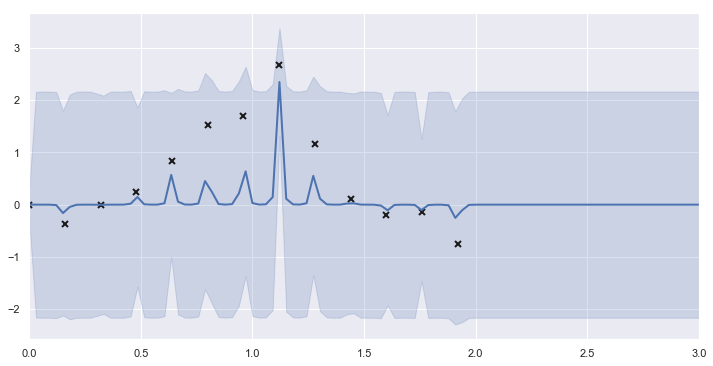

In [121]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [122]:
#another lengthscale value
5

5

In [123]:
# starts again here
training_data=ou_levels(1,b,dt,2,time)
t=time# time vector
x=training_data

In [124]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [125]:
t=t[::8]
x=x[::8]


In [126]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [127]:
k = gpflow.kernels.Matern12(1,lengthscales=5)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01# observation noise

Text(0,0.5,'OU level')

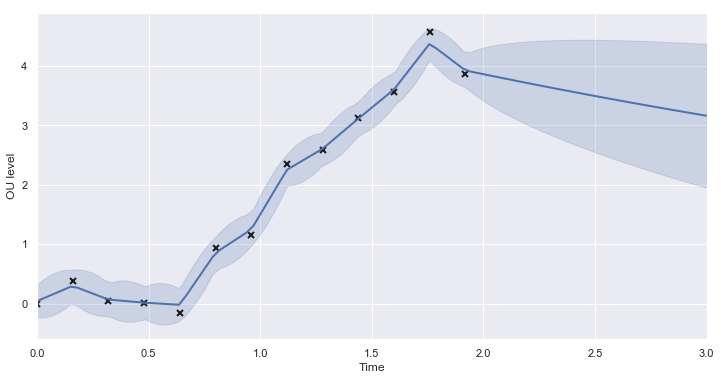

In [128]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [129]:
m.as_pandas_table()
# the first variance is the standard error^2 from the mean
# the second variance is observation error
# the lengthscales determine how smooth the line is


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,5.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.120304
  Number of iterations: 24
  Number of functions evaluations: 27


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.120304
  Number of iterations: 24
  Number of functions evaluations: 27


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,6.9573005459095985
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,5.220017471000138
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.7505981679181262e-06


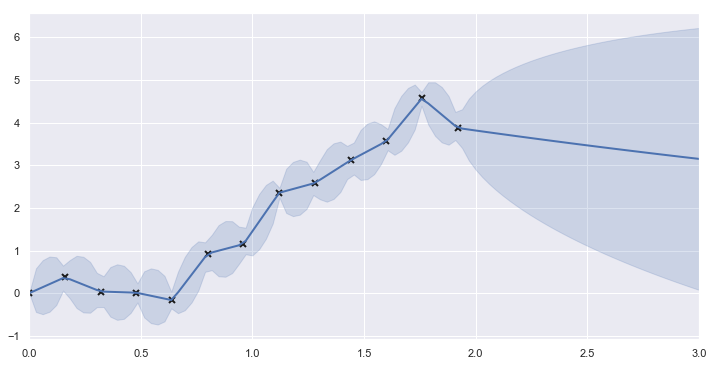

In [130]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [131]:
# Simulate from a GP and then check the parameters

In [132]:
with gpflow.defer_build():
    X = np.random.rand(20, 1)
    Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + np.random.randn(20,1) * 0.01
    m = gpflow.models.GPR(X, Y, kern=gpflow.kernels.Matern32(1,lengthscales=0.3,variance=0.5))
    m.likelihood.variance=0.01

In [133]:
m.as_pandas_table()


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.5
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.3
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


In [134]:
m.compile()
opt = gpflow.train.ScipyOptimizer()
opt.minimize(m)
m.as_pandas_table()


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 0.880112
  Number of iterations: 18
  Number of functions evaluations: 20


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 0.880112
  Number of iterations: 18
  Number of functions evaluations: 20


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.1125822526276852
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.14889895210263598
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,8.998602567131582e-05


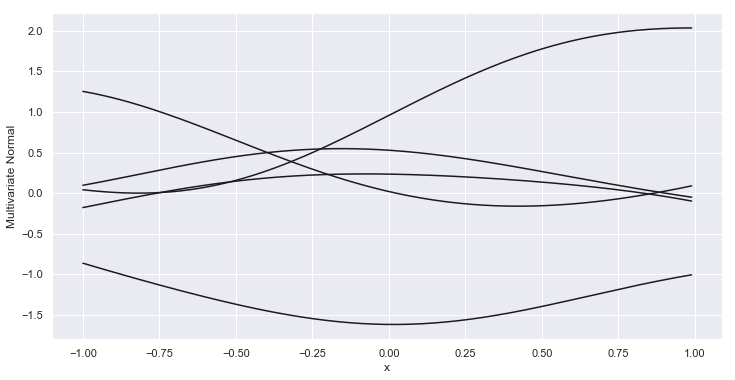

In [135]:
# I try again with different code
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x1, x2, variance = 1):
    return exp(-1 * ((x1-x2) ** 2) / (2*variance))

def gram_matrix(xs):
    return [[rbf_kernel(x1,x2) for x2 in xs] for x1 in xs]

xs = np.arange(-1, 1, 0.01)
mean = [0 for x in xs]# lol, this is a column of zeros
gram = gram_matrix(xs)# this a matrix formed by a column of values

plt_vals = []
for i in range(0, 5):
    ys = np.random.multivariate_normal(mean, gram)
    plt_vals.extend([xs, ys, "k"])
plt.plot(*plt_vals)
plt.xlabel('x')
plt.ylabel('Multivariate Normal')
plt.show()

Text(0,0.5,'y')

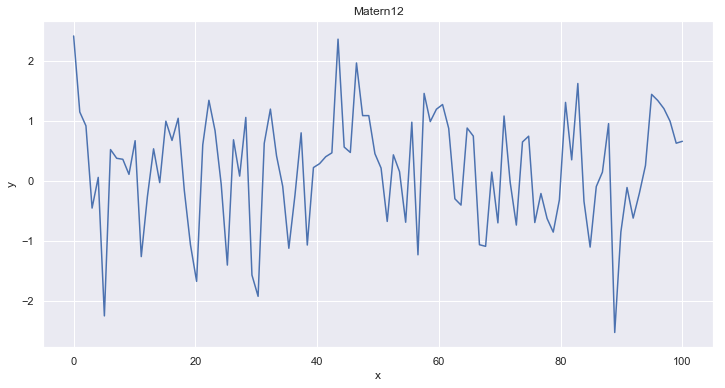

In [136]:
# try again with gpflow and a different kernel
k = gpflow.kernels.Matern12(1,variance=1,lengthscales=1)# kernel
xmin=0
xmax=100
N=100
xx = np.linspace(xmin, xmax, N)[:,None]
K = k.compute_K_symm(xx)# this calculates the covariance matrix
y = np.random.multivariate_normal(np.zeros(N), K, 1).T
plt.plot(xx, y)
plt.title(k.__class__.__name__)
plt.xlabel('x')
plt.ylabel('y')
# So I create the kernel,then I have 100 points, I calculate the covariance matrix K for xx and then I calculate y as a multivariate normal 
# wiith mean 0 and covariance K

In [137]:
m = gpflow.models.GPR(xx,y,kern=k)
m.likelihood.variance = 0.01# observation noise
m.kern.variance=1
m.kern.lengthscales=1
m.as_pandas_table()
# I don't get the parameters back by maximum likelihood

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 136.583045
  Number of iterations: 6
  Number of functions evaluations: 8


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 136.583045
  Number of iterations: 6
  Number of functions evaluations: 8


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,0.9441923226298169
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.715735746030264
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.010057070170660697


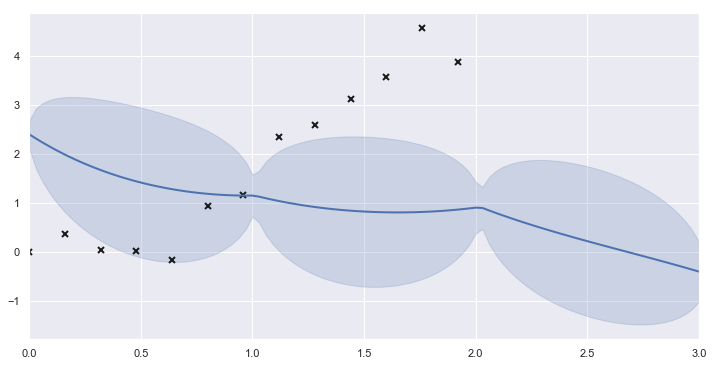

In [138]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()

In [139]:
# This is how you compute the log likelihood
m.compute_log_likelihood()

-136.5830447039002

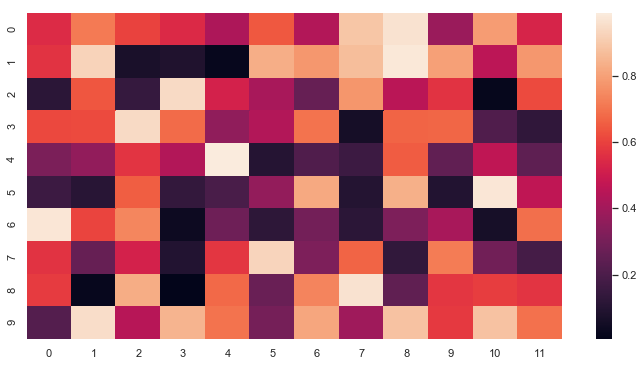

In [140]:
import numpy as np
np.random.seed(0)
import seaborn as sns; 
sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

Automatically created module for IPython interactive environment
Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy: 1.000 (initial) 1.000 (optimized)
Log-loss: 0.214 (initial) 0.319 (optimized)


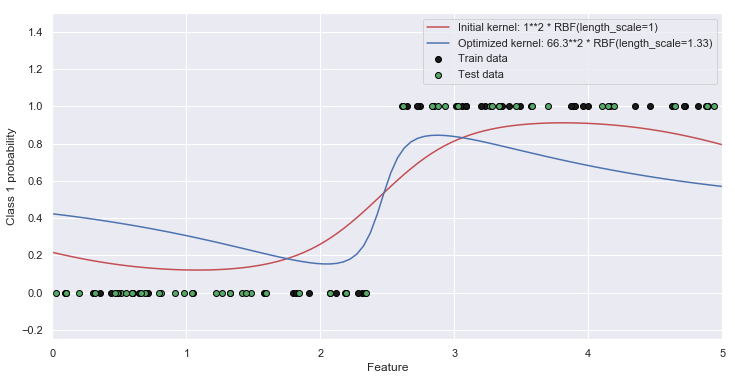

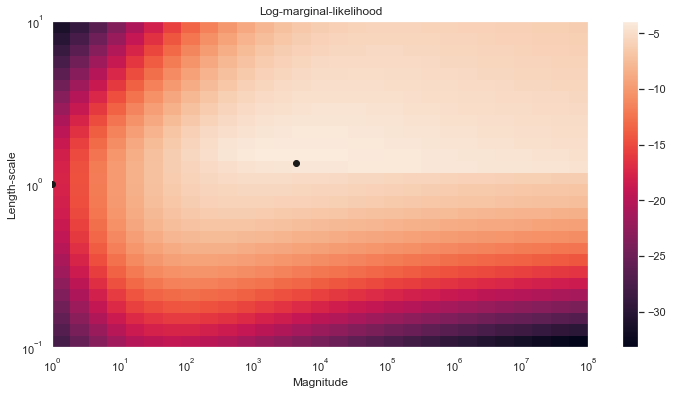

In [299]:
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


# Generate data
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 100)[:, np.newaxis]
y = np.array(X[:, 0] > 2.5, dtype=int)

# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])),
         accuracy_score(y[:train_size], gp_opt.predict(X[:train_size]))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]),
         log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1])))


# Plot posteriors
plt.figure(0)
plt.scatter(X[:train_size, 0], y[:train_size], c='k', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X[train_size:, 0], y[train_size:], c='g', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Plot LML landscape
plt.figure(1)
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

In [300]:
#This is Gaussian processes classification
# get OU data first
dt=0.02
time=np.arange(0,2,dt)# time
sigma=0.3
a=1# the coefficient in front, the rate
b=1.2# the mean
training_data=ou_levels(a,b,dt,sigma,time)
t=time# time vector
x=training_data
#t=t[::8]
#x=x[::8]
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [301]:
len(t)

100

Log Marginal Likelihood (initial): -46.047
Log Marginal Likelihood (optimized): -5.026
Accuracy: 0.820 (initial) 1.000 (optimized)
Log-loss: 0.376 (initial) 0.247 (optimized)


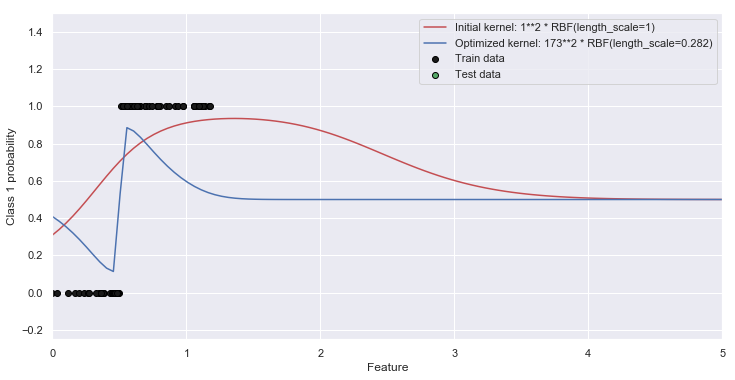

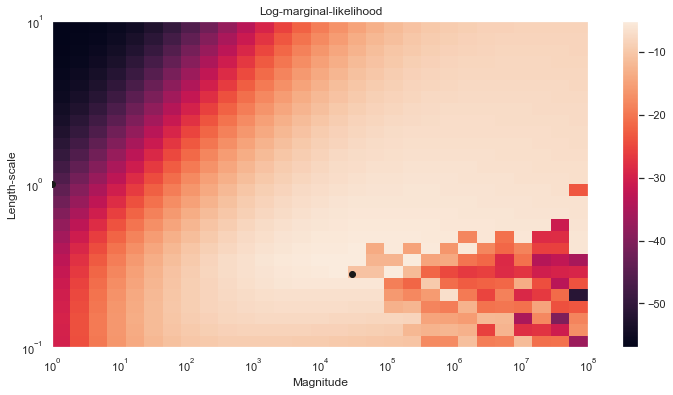

In [302]:
# Generate data
train_size = 100
#rng = np.random.RandomState(0)
#X = rng.uniform(0, 5, 100)[:, np.newaxis]
#y = np.array(X[:, 0] > 2.5, dtype=int)
X=x_column
y = np.array(X[:, 0] > 0.5, dtype=int)

# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])),
         accuracy_score(y[:train_size], gp_opt.predict(X[:train_size]))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]),
         log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1])))


# Plot posteriors
plt.figure(0)
plt.scatter(X[:train_size, 0], y[:train_size], c='k', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X[train_size:, 0], y[train_size:], c='g', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Plot LML landscape
plt.figure(1)
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

In [303]:
#try different kernels code with OU data
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot


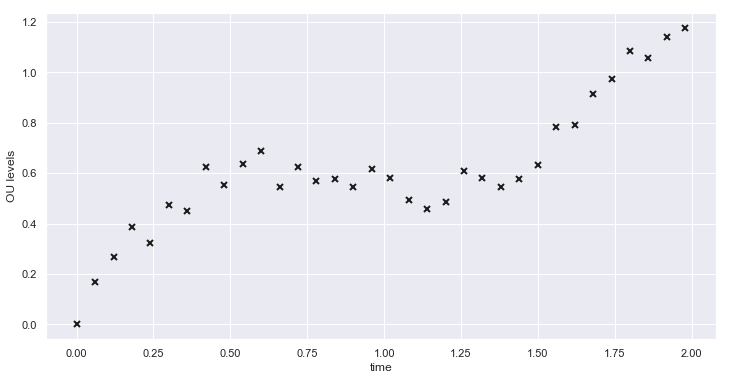

In [304]:
np.random.seed(0)
X = t_column[::3]
Y = x_column[::3]
Xtest = np.random.rand(10,1)*5
plt.plot(X, Y, 'kx', mew=2)
plt.xlabel('time')
plt.ylabel('OU levels')
plt.show()

In [305]:
m1 = gpflow.models.GPR(X, Y, gpflow.kernels.Matern12(1))
m2 = gpflow.models.GPR(X, Y, gpflow.kernels.Matern32(1))
m3 = gpflow.models.GPR(X, Y,gpflow.kernels.Matern52(1))
m4 =gpflow.models.GPR(X, Y,gpflow.kernels.RBF(1))
m5 = gpflow.models.GPR(X, Y, gpflow.kernels.Constant(1))
m6 = gpflow.models.GPR(X, Y,gpflow.kernels.Linear(1))
m7=gpflow.models.GPR(X, Y,gpflow.kernels.Cosine(1))
m8=gpflow.models.GPR(X, Y,gpflow.kernels.Periodic(1))
models = [m1, m2, m3, m4, m5, m6,m7,m8]


In [306]:
names= ['Matern12(1)','Matern32(1)','Matern52(1)','RBF(1)','Constant(1)','Linear(1)','Cosine(1)','Periodic(1)']

In [307]:
#o = gpflow.train.ScipyOptimizer(method='BFGS')
#_ = [o.minimize(m, maxiter=100) for m in models]

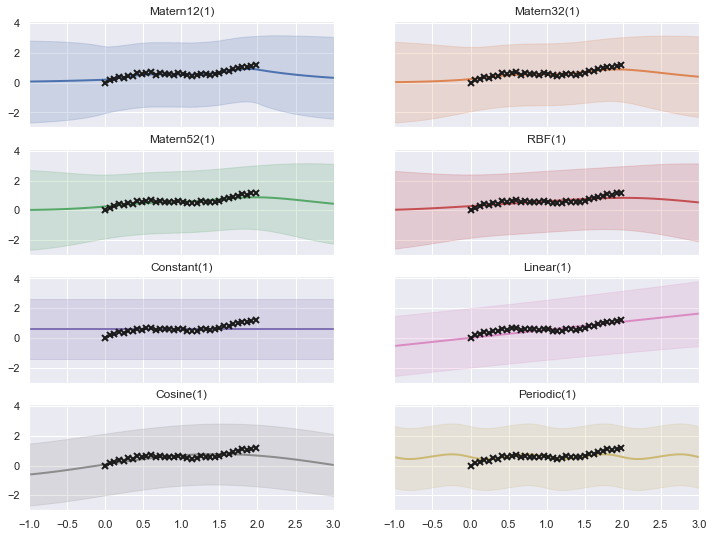

In [308]:
def plot(m, color, ax,names):
    xx = np.linspace(-1, 3, 100)[:,None]
    mu, var = m.predict_y(xx)
    ax.plot(xx, mu, color, lw=2)
    ax.fill_between(xx[:,0], mu[:,0] -  2*np.sqrt(var[:,0]), mu[:,0] +  2*np.sqrt(var[:,0]), color=color, alpha=0.2)
    ax.plot(X, Y, 'kx', mew=2)
    ax.set_xlim(-1, 3)
    ax.set_title(names)
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m1, 'C0',ax[0,0],names[0])# top left is the origin
plot(m2, 'C1', ax[0,1],names[1])# this is the one below
plot(m3, 'C2',ax[1,0],names[2])# this is the first on the right
plot(m4, 'C3',ax[1,1],names[3])
plot(m5, 'C4',ax[2,0],names[4])
plot(m6, 'C6', ax[2,1],names[5])
plot(m7, 'C7',ax[3,0],names[6])
plot(m8, 'C8',ax[3,1],names[7])


In [309]:
from IPython import display
#_ = [display.display(m.kern, m.likelihood) for m in models]
[print(m.kern, '\n\n', m.likelihood, '\n\n----\n') for m in models];

                           class prior transform  trainable shape  \
GPR/kern/variance      Parameter  None       +ve       True    ()   
GPR/kern/lengthscales  Parameter  None       +ve       True    ()   

                       fixed_shape value  
GPR/kern/variance             True   1.0  
GPR/kern/lengthscales         True   1.0   

                              class prior transform  trainable shape  \
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape value  
GPR/likelihood/variance         True   1.0   

----

                           class prior transform  trainable shape  \
GPR/kern/variance      Parameter  None       +ve       True    ()   
GPR/kern/lengthscales  Parameter  None       +ve       True    ()   

                       fixed_shape value  
GPR/kern/variance             True   1.0  
GPR/kern/lengthscales         True   1.0   

                              class prior transform  trainable shape  \
GPR/like

In [310]:
print(np.array([m.compute_log_likelihood() for m in models]))


[-37.19811996 -35.63030786 -35.38081763 -35.09934392 -34.33392662
 -33.92021865 -35.03678284 -35.65312506]


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -32.120065
  Number of iterations: 33
  Number of functions evaluations: 44


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -32.120065
  Number of iterations: 33
  Number of functions evaluations: 44


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -36.088107
  Number of iterations: 9
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -36.088107
  Number of iterations: 9
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -36.923671
  Number of iterations: 8
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -36.923671
  Number of iterations: 8
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -38.019931
  Number of iterations: 12
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -38.019931
  Number of iterations: 12
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 5.254436
  Number of iterations: 9
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 5.254436
  Number of iterations: 9
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -4.859219
  Number of iterations: 8
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -4.859219
  Number of iterations: 8
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -11.597265
  Number of iterations: 17
  Number of functions evaluations: 23


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -11.597265
  Number of iterations: 17
  Number of functions evaluations: 23


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -2.207737
  Number of iterations: 15
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -2.207737
  Number of iterations: 15
  Number of functions evaluations: 21


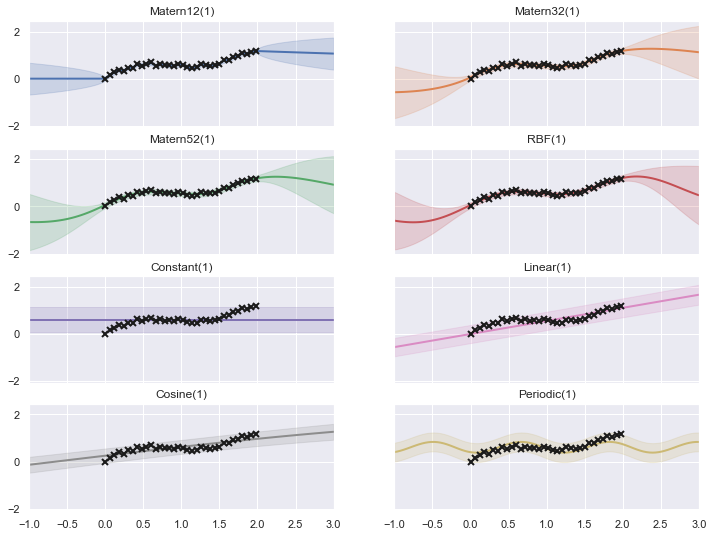

In [312]:
# now plot the optimized plots
o = gpflow.train.ScipyOptimizer(method='BFGS')
opt = [o.minimize(m, maxiter=100) for m in models]
f, ax = plt.subplots(4,2,sharex=True, sharey=True, figsize=(12,9))
plot(m1, 'C0',ax[0,0],names[0])# top left is the origin
plot(m2, 'C1', ax[0,1],names[1])# this is the one below
plot(m3, 'C2',ax[1,0],names[2])# this is the first on the right
plot(m4, 'C3',ax[1,1],names[3])
plot(m5, 'C4',ax[2,0],names[4])
plot(m6, 'C6', ax[2,1],names[5])
plot(m7, 'C7',ax[3,0],names[6])
plot(m8, 'C8',ax[3,1],names[7])


In [325]:
# Simulating from a GP prior with different kernels
# Simulating OU data first
dt=0.02
time=np.arange(0,2,dt)# time
sigma=0.3
a=1# the coefficient in front, the rate
b=1.2# the mean

In [326]:
training_data=ou_levels(a,b,dt,sigma,time)# the first one is zero because param_all_r0 starts at 0
t=time# time vector
x=training_data

In [329]:
def plotkernelsample(k, ax, xmin=-3, xmax=3):
    xx = training_data.reshape(-1,1)
    K = k.compute_K_symm(xx)
    ax.plot(xx, np.random.multivariate_normal(np.zeros(100), K, 3).T)
    ax.set_title(k.__class__.__name__)

def plotkernelfunction(K, ax, xmin=-3, xmax=3, other=0):
    xx =training_data.reshape(-1,1)
    K = k.compute_K_symm(xx)
    ax.plot(xx, k.compute_K(xx, np.zeros((1,1)) + other))
    ax.set_title(k.__class__.__name__ + ' k(x, %f)'%other)

(-3, 3)

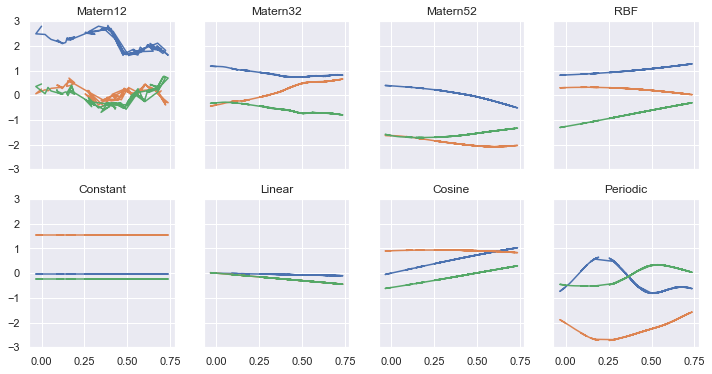

In [330]:
f, axes = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
plotkernelsample(gpflow.kernels.Matern12(1), axes[0,0])
plotkernelsample(gpflow.kernels.Matern32(1), axes[0,1])
plotkernelsample(gpflow.kernels.Matern52(1), axes[0,2])
plotkernelsample(gpflow.kernels.RBF(1), axes[0,3])
plotkernelsample(gpflow.kernels.Constant(1), axes[1,0])
plotkernelsample(gpflow.kernels.Linear(1), axes[1,1])
plotkernelsample(gpflow.kernels.Cosine(1), axes[1,2])
plotkernelsample(gpflow.kernels.Periodic(1), axes[1,3])
axes[0,0].set_ylim(-3, 3)


In [334]:
# get OU data and do the marginal likelihoods against the parameters 


Automatically created module for IPython interactive environment


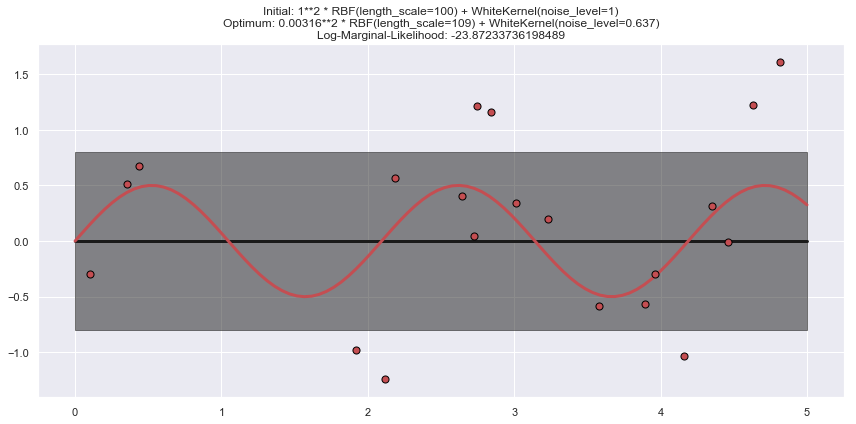

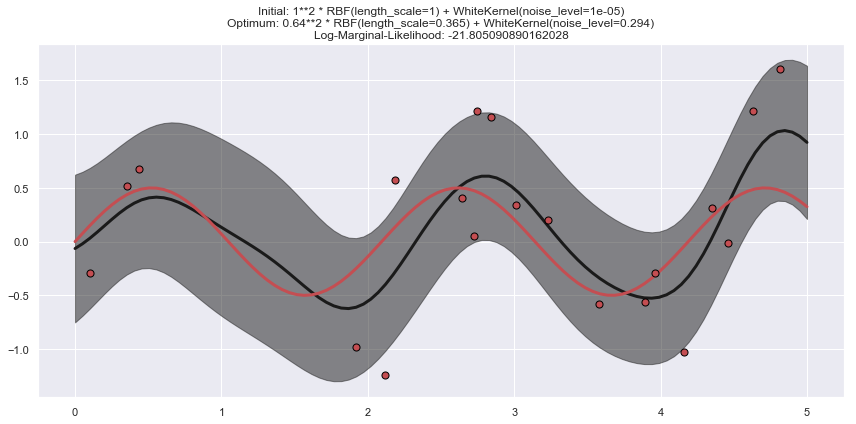

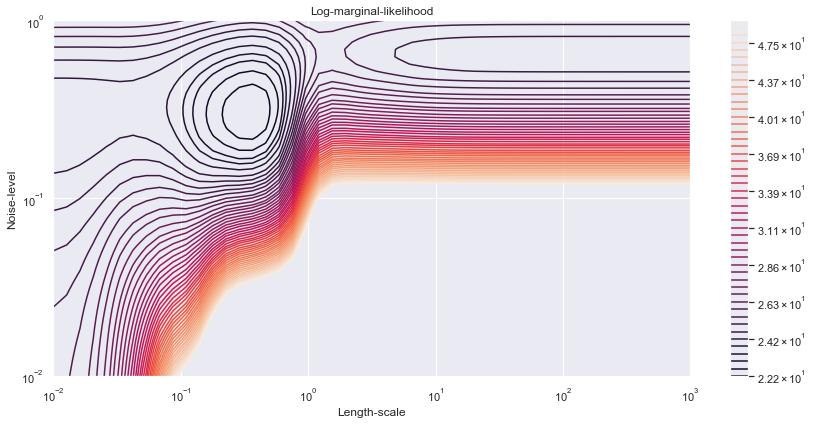

In [378]:
#Example of code
# code for marginal likelihood
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Second run
plt.figure(1)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Plot LML landscape
plt.figure(2)
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

In [383]:
#OU data
# get OU data first
dt=0.02
time=np.arange(0,2,dt)# time
sigma=0.3
a=1# the coefficient in front, the rate
b=1.2# the mean
training_data=ou_levels(a,b,dt,sigma,time)
#t=time# time vector
#x=training_data
#t=t[::8]
#x=x[::8]
#t_column=t.reshape(-1,1)
#x_column=x.reshape(-1,1)

In [384]:
# changing the code
X=time.reshape(-1,1)
y=training_data

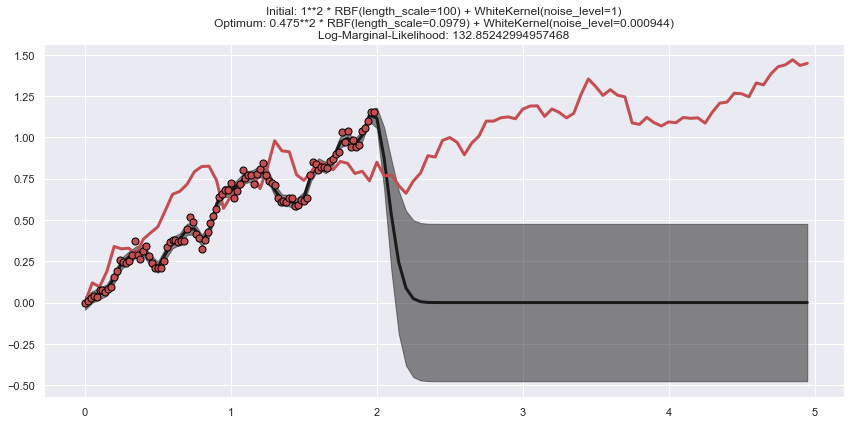

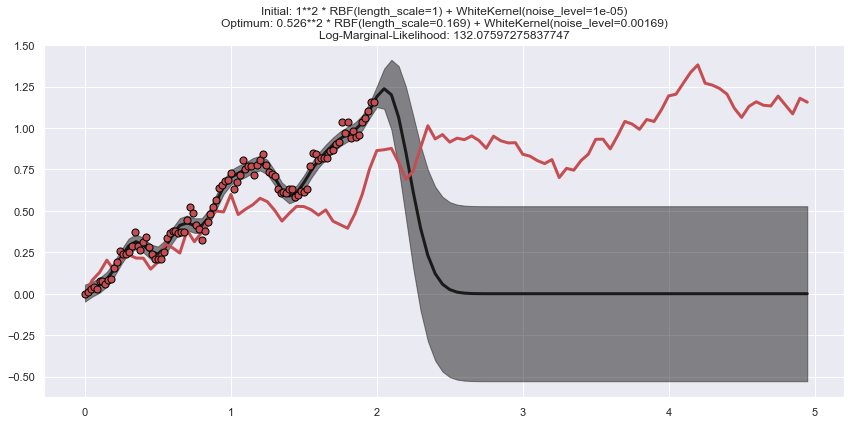

<Figure size 864x432 with 0 Axes>

In [408]:
#rng = np.random.RandomState(0)# not fine in case
#X = rng.uniform(0, 5, 20)[:, np.newaxis]
#y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
#X_ = np.linspace(0, 5, 100)# watch it here, old code
dt=0.05
X_=np.arange(0,5,dt)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
time_=X_
y_=ou_levels(a,b,dt,sigma,time)
plt.plot(X_, y_, 'r', lw=3, zorder=9)# this is what I think about, ou_levels(a,b,dt,sigma,time)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Second run
plt.figure(1)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
dt=0.05
X_=np.arange(0,5,dt)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
time_=X_
y_=ou_levels(a,b,dt,sigma,time)
plt.plot(X_, y_, 'r', lw=3, zorder=9)# again here
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Plot LML landscape
plt.figure(2)
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.35, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T



In [414]:
# check vmin, vmax
#vmin, vmax = (-LML).min(), (-LML).max()
vmax=LML.min()
vmin=LML.max()
vmax,vmin


(-319.23410649018587, 100.52935738085044)

In [438]:
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
theta0,theta1

(array([1.00000000e-02, 1.27106180e-02, 1.61559810e-02, 2.05352503e-02,
        2.61015722e-02, 3.31767113e-02, 4.21696503e-02, 5.36002317e-02,
        6.81292069e-02, 8.65964323e-02, 1.10069417e-01, 1.39905031e-01,
        1.77827941e-01, 2.26030303e-01, 2.87298483e-01, 3.65174127e-01,
        4.64158883e-01, 5.89974626e-01, 7.49894209e-01, 9.53161883e-01,
        1.21152766e+00, 1.53992653e+00, 1.95734178e+00, 2.48790237e+00,
        3.16227766e+00, 4.01945033e+00, 5.10896977e+00, 6.49381632e+00,
        8.25404185e+00, 1.04913973e+01, 1.33352143e+01, 1.69498815e+01,
        2.15443469e+01, 2.73841963e+01, 3.48070059e+01, 4.42418555e+01,
        5.62341325e+01, 7.14770577e+01, 9.08517576e+01, 1.15478198e+02,
        1.46779927e+02, 1.86566358e+02, 2.37137371e+02, 3.01416253e+02,
        3.83118685e+02, 4.86967525e+02, 6.18965819e+02, 7.86743808e+02,
        1.00000000e+03]),
 array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
        0.01599859, 0.01757511, 0.01930698

In [415]:
vmax=319
vmin=100

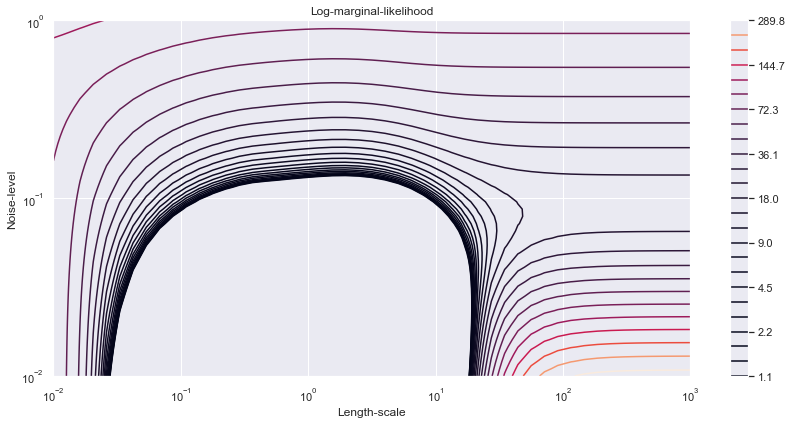

In [453]:
level = np.around(np.logspace(0.05, 10, 100), decimals=1)
plt.contour(Theta0, Theta1, -LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()